## AI Project UCS415 
#### Finding Popularity of Spotify Songs 
Nitansh Jain  102017025

``` Importing Pandas and Numpy ``` 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn

Converting data from the csv file to a dataframe

In [32]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [33]:
# checking if any null or nan values are present
print(spotify_df.isna().sum())

title          0
artist         0
top genre      0
year           0
added          0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
top year       0
artist_type    0
pop            0
dtype: int64


In [34]:
# checking data types of all columns
spotify_df.dtypes

title          object
artist         object
top genre      object
year            int64
added          object
bpm             int64
nrgy            int64
dnce            int64
dB              int64
live            int64
val             int64
dur             int64
acous           int64
spch            int64
top year        int64
artist_type    object
pop             int64
dtype: object

In [35]:
# converting artist type column values to a number [0,1,2]
print(spotify_df['artist_type'].value_counts())
spotify_df['artist_type'] = spotify_df['artist_type'].astype('category').cat.codes
print(spotify_df['artist_type'].value_counts())

Solo          748
Band/Group    168
Duo            70
Trio           13
Name: artist_type, dtype: int64
2    748
0    168
1     70
3     13
Name: artist_type, dtype: int64


In [36]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,title,artist,genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,popularity
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,1,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,1,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,2,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,2,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,2,79


In [37]:
spotify_df['year'] = spotify_df['year'].astype('Int64')
spotify_df['top year'] = spotify_df['top year'].astype('Int64')

In [38]:
sns.pairplot(spotify_df, hue='genre')

<AxesSubplot:>

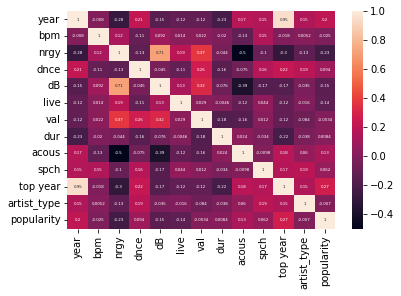

In [ ]:
sns.heatmap(spotify_df.corr(), annot=True, annot_kws={"size": 4})

In [ ]:
# checking correlation table
spotify_df.head()
spotify_df.corr(method='pearson')

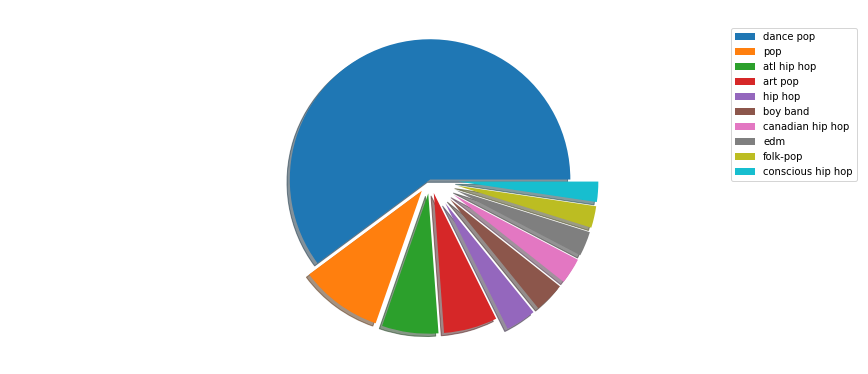

In [ ]:
# creating a pie chart showing which genre ended up as a top song on average
explode_list = [0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
fig = spotify_df['genre'].value_counts().nlargest(10).plot(kind='pie',
                                        figsize=(15,6),
                                        autopct='%1.1f%%',
                                        shadow=True,
                                        labels=None,
                                        pctdistance=1.2,
                                        textprops={'fontsize': 12, 'color':'white'},
                                        explode=explode_list,
                                        )


plt.title('Top 10 Genres', color='white')
plt.ylabel('Genre', color='white')
plt.axis('equal')
# add legend
plt.legend(labels=spotify_df['genre'].value_counts().nlargest(10).index, loc='upper right') 
plt.show()

<AxesSubplot:xlabel='spch', ylabel='popularity'>

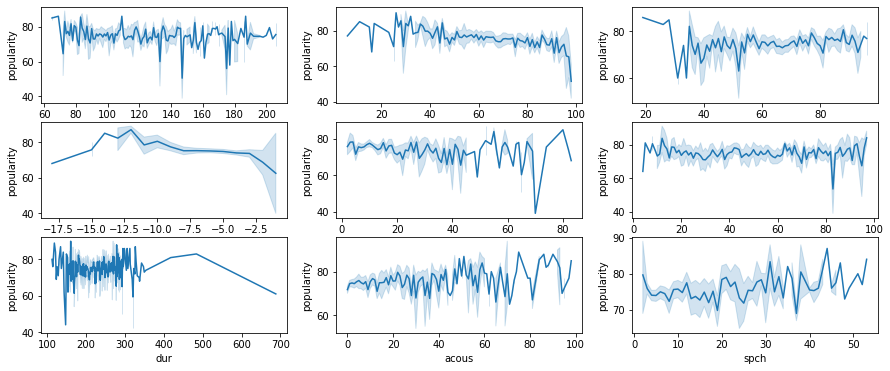

In [ ]:
fig1, axes = plt.subplots(3, 3, figsize=(15,6))

# creating line plot showing bpm vs popularity
sns.lineplot(ax=axes[0, 0], x='bpm', y='popularity', data=spotify_df)

# creating line plot showing energy vs popularity
sns.lineplot(ax=axes[0, 1], x='nrgy', y='popularity', data=spotify_df)

# creating line plot showing danceability vs popularity
sns.lineplot(ax=axes[0, 2], x='dnce', y='popularity', data=spotify_df)

# creating line plot showing decibels vs popularity
sns.lineplot(ax=axes[1, 0], x='dB', y='popularity', data=spotify_df)

# creating line plot showing live vs popularity
sns.lineplot(ax=axes[1, 1], x='live', y='popularity', data=spotify_df)

# creating line plot showing val vs popularity
sns.lineplot(ax=axes[1, 2], x='val', y='popularity', data=spotify_df)

# creating line plot showing dur vs popularity
sns.lineplot(ax=axes[2, 0], x='dur', y='popularity', data=spotify_df)

# creating line plot showing acous vs popularity
sns.lineplot(ax=axes[2, 1], x='acous', y='popularity', data=spotify_df)

# creating line plot showing spch vs popularity
sns.lineplot(ax=axes[2, 2], x='spch', y='popularity', data=spotify_df)

[Text(0, 0, 'Band/Group'),
 Text(1, 0, 'Duo'),
 Text(2, 0, 'Solo'),
 Text(3, 0, 'Trio')]

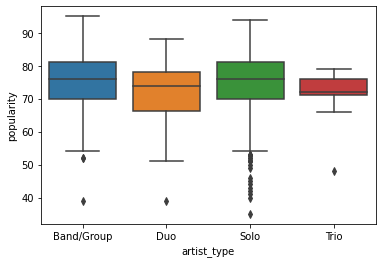

In [ ]:
# # creating boxplot based on artist_type
ax = sns.boxplot(x='artist_type', y='popularity', data=spotify_df)
ax.set_xticklabels(['Band/Group','Duo', 'Solo', 'Trio'])


,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,popularity
year,1.000000,-0.007981,-0.282429,0.213463,-0.154889,-0.118734,-0.116083,-0.225951,0.174142,0.154647,0.947380,0.147062,0.201272
bpm,-0.007981,1.000000,0.120413,-0.110106,0.091673,0.014285,0.022279,-0.019559,-0.125350,0.149920,-0.018276,0.005170,-0.025281
nrgy,-0.282429,0.120413,1.000000,-0.133745,0.712318,0.185270,0.371417,-0.043786,-0.503696,-0.100989,-0.300519,-0.131609,-0.233965
dnce,0.213463,-0.110106,-0.133745,1.000000,-0.045303,-0.112625,0.262842,-0.162642,-0.074588,0.160960,0.222128,0.188593,0.093914
dB,-0.154889,0.091673,0.712318,-0.045303,1.000000,0.129418,0.315341,-0.075963,-0.391791,-0.167420,-0.170527,-0.035053,-0.145215
live,-0.118734,0.014285,0.185270,-0.112625,0.129418,1.000000,0.028707,-0.004641,-0.116467,0.043775,-0.122205,-0.016284,-0.137434
val,-0.116083,0.022279,0.371417,0.262842,0.315341,0.028707,1.000000,-0.182705,-0.163256,0.012497,-0.121045,-0.083838,-0.003437
dur,-0.225951,-0.019559,-0.043786,-0.162642,-0.075963,-0.004641,-0.182705,1.000000,0.024095,-0.033816,-0.221982,-0.038083,0.008445
acous,0.174142,-0.125350,-0.503696,-0.074588,-0.391791,-0.116467,-0.163256,0.024095,1.000000,-0.009797,0.180841,0.059637,0.128051
spch,0.154647,0.149920,-0.100989,0.160960,-0.167420,0.043775,0.012497,-0.033816,-0.009797,1.000000,0.166977,0.188788,0.061587
